# * BRFSS Survey Data Analysis for the Year 2021-2022

In [49]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

## - Load Data

In [27]:
df_BRFSS = pd.read_csv("../Data/BRFSS_preprocessed.csv")

In [28]:
df_BRFSS.head()

,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.frtres1,x.vegres1,x.frutsu1,x.vegesu1,x.frtlt1a,x.veglt1a,x.frt16a,x.veg23a,x.fruite1,x.vegete1
0,1,1,1,1192021,1,19,2021,1100,2021000001,2021000001,...,1,1,100.0,214.0,1,1,1,1,0,0
1,2,1,1,1212021,1,21,2021,1100,2021000002,2021000002,...,1,1,100.0,128.0,1,1,1,1,0,0
2,3,1,1,1212021,1,21,2021,1100,2021000003,2021000003,...,1,1,100.0,71.0,1,2,1,1,0,0
3,4,1,1,1172021,1,17,2021,1100,2021000004,2021000004,...,1,1,114.0,165.0,1,1,1,1,0,0
4,5,1,1,1152021,1,15,2021,1100,2021000005,2021000005,...,1,1,100.0,258.0,1,1,1,1,0,0


## - Dataset Details

In [29]:
print('Total Records:', df_BRFSS.shape[0])
print('Total Columns:', df_BRFSS.shape[1])

Total Records: 438693
Total Columns: 304


In [30]:
print('\nColumn Names:\n', list(df_BRFSS.columns))


Column Names:
 ['Unnamed: 0', 'x.state', 'fmonth', 'idate', 'imonth', 'iday', 'iyear', 'dispcode', 'seqno', 'x.psu', 'ctelenm1', 'pvtresd1', 'colghous', 'statere1', 'celphon1', 'ladult1', 'colgsex', 'numadult', 'landsex', 'nummen', 'numwomen', 'respslct', 'safetime', 'ctelnum1', 'cellfon5', 'cadult1', 'cellsex', 'pvtresd3', 'cclghous', 'cstate1', 'landline', 'hhadult', 'sexvar', 'genhlth', 'physhlth', 'menthlth', 'poorhlth', 'priminsr', 'persdoc3', 'medcost1', 'checkup1', 'exerany2', 'bphigh6', 'bpmeds', 'cholchk3', 'toldhi3', 'cholmed3', 'cvdinfr4', 'cvdcrhd4', 'cvdstrk3', 'asthma3', 'asthnow', 'chcscncr', 'chcocncr', 'chccopd3', 'addepev3', 'chckdny2', 'diabete4', 'diabage3', 'havarth5', 'arthexer', 'arthedu', 'lmtjoin3', 'arthdis2', 'joinpai2', 'marital', 'educa', 'renthom1', 'numhhol3', 'numphon3', 'cpdemo1b', 'veteran3', 'employ1', 'children', 'income3', 'pregnant', 'weight2', 'height3', 'deaf', 'blind', 'decide', 'diffwalk', 'diffdres', 'diffalon', 'smoke100', 'smokday2', 'useno

In [31]:
# Columns with more than 50% of Null Values
# Null_cols = df_BRFSS.isnull().sum()/len(df_BRFSS)
# BRFSS_Nullcols = Null_cols[Null_cols>0.6].index
# display(len(BRFSS_Nullcols))

In [32]:
# BRFSS_Nullcols

## - Filter data to Indiana State

In [33]:
#Saperating out the Indiana State from rest of the states 
df_Indiana = df_BRFSS[df_BRFSS['x.state']==18]
print('IN Total Records:', df_Indiana.shape[0])
print('IN Total Columns:', df_Indiana.shape[1])

IN Total Records: 9929
IN Total Columns: 304


### Pre-processing: NaN removal

In [34]:
print('Columns containing number of null values:\n')
null_val = df_Indiana.isnull().sum().sort_values(ascending=False)

null_val[null_val>1000]

Columns containing number of null values:



stoltest    9929
pdiabtst    9929
crvclpap    9929
crvclhpv    9929
hadhyst2    9929
            ... 
potatoe1    1139
wtkg3       1120
frenchf1    1096
fvgreen1    1052
fruitju2    1012
Length: 180, dtype: int64

In [35]:
# print('Columns containing all the values null:\n')
# print(df_Indiana.columns[df_Indiana.isnull().all()])

print('\nNan removal: Remove col if all values are null') # remove column if all the values are null
df_Indiana_na = df_Indiana.dropna(axis=1, how='all')
df_IN = df_Indiana_na.drop(['Unnamed: 0'], axis=1)

print('Total Records:', df_IN.shape[0])
print('Total Columns:', df_IN.shape[1])

# df_IN.to_csv('../Data/BRFSS_IN_Pros.csv', index=False)


Nan removal: Remove col if all values are null
Total Records: 9929
Total Columns: 220


### Year wise count

In [36]:
print('Contains data of following year/count:')
print(df_IN['iyear'].value_counts())
# print('\n\nIndiana State Data:\n', df_IN)

Contains data of following year/count:
2021    9439
2022     490
Name: iyear, dtype: int64


## Indicator Focused Analysis

1. Quality of Life 	

    i. Poor or fair health Percentage of adults reporting fair or poor health (age-adjusted).

 	ii. Poor physical health days Average number of physically unhealthy days reported in past 30 days (age-adjusted).

 	iii. Poor mental health days Average number of mentally unhealthy days reported in past 30 days (age-adjusted).

2. Tobacco Use	

    i. Adult smoking Percentage of adults who are current smokers (age-adjusted).

3. Diet and Exercise

    i. Adult obesity Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).

 	ii. Physical inactivity	Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).

4. Alcohol and Drug Use	

    i. Excessive drinking Percentage of adults reporting binge or heavy drinking (age-adjusted).
    

## - Column selection based on indicators

In [188]:
# Selecting the columns based on the above indicators
df_IN_Health = df_IN.filter(regex='smoke|_smoker3|genhlth|menthlth|poorhlth|physhlth|age|drug|alcohol|Alcohal|idate|imonth|iday|iyear|exerany2|x.rfbing5|x.rfbmi5|drnk3ge5|x.imprace|cadult1|ladult1|x.racegr3|x.race|x.ageg5yr|htm4|wtkg3')

print('Total Records:', df_IN_Health.shape[0])
print('Total Columns:', df_IN_Health.shape[1])

Total Records: 9929
Total Columns: 29


In [224]:
# age filter processinhg

# create bins for age groups
bins = [0, 7, 9, 12, 13, 14]

# create labels for age groups
labels = ['18-54', '55-64', '65-79', '80+', '0']

# create a new column with age groups
df_IN_Health['age_grp'] = pd.cut(df_IN_Health['x.ageg5yr'], bins=bins, labels=labels)

print(df_IN_Health['age_grp'].value_counts())

18-54    4321
65-79    2558
55-64    1933
80+       806
0         311
Name: age_grp, dtype: int64


C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2639491667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN_Health['age_grp'] = pd.cut(df_IN_Health['x.ageg5yr'], bins=bins, labels=labels)


In [225]:
# race filter processing

# create bins for age groups
bins = [0, 1, 2, 7, 8, 9]

# create labels for age groups
labels = ['white', 'black', 'other', 'hispanic', 'NA']

# create a new column with age groups
df_IN_Health['race_grp'] = pd.cut(df_IN_Health['x.race'], bins=bins, labels=labels)

print(df_IN_Health['race_grp'].value_counts())

white       7847
black        781
other        550
hispanic     500
NA           251
Name: race_grp, dtype: int64


C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2384076557.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN_Health['race_grp'] = pd.cut(df_IN_Health['x.race'], bins=bins, labels=labels)


## 1. Quality of Life

### 1.1 Poor or fair health: Percentage of adults reporting fair or poor health

*-*-* % of adults reporting fair or poor health *-*-*



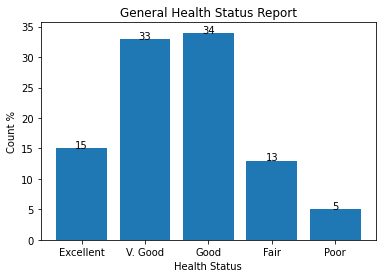

In [228]:
print('*-*-* % of adults reporting fair or poor health *-*-*\n')
    
# calculate the % values for that gr
genhlth_dict = dict(round(df_IN_Health['genhlth'].value_counts()/len(df_IN_Health)*100))
genhlth_key = {1.0 :'Excellent', 2.0:'V. Good', 3.0:'Good', 4.0:'Fair', 5.0:'Poor', 7.0:'Notsure', 9.0:'Refused'}

try:
    genhlth_dict.pop(7.0)
    genhlth_dict.pop(9.0) # remove not answered values (9 label)
except KeyError: # key is not present in the dictionary
    pass

# rename the keys to actual label (1->excellent)
new_dict = {}
for ix in genhlth_dict:
    new_dict[genhlth_key[ix]] = genhlth_dict[ix]
# print('\nUpdated dict:', new_dict)

# keep order of graph fixed
new_dict = OrderedDict([('Excellent', new_dict['Excellent']), ('V. Good', new_dict['V. Good']), ('Good', new_dict['Good']), ('Fair', new_dict['Fair']), ('Poor', new_dict['Poor'])])

names = list(new_dict.keys())
values = list(new_dict.values())

plt.bar(names, values)

# add count label and title
for ix in range(len(names)):    
    v = int(values[ix])
    plt.text(ix, v, str(v), ha='center', fontsize=10)

# Set the labels and title
plt.xlabel('Health Status')
plt.ylabel('Count %')
plt.title('General Health Status Report')

# Show the plots
plt.show()

### 1.1.1 Poor or fair health: Age adjusted

*-*-* % of adults reporting fair or poor health - age adjusted *-*-*



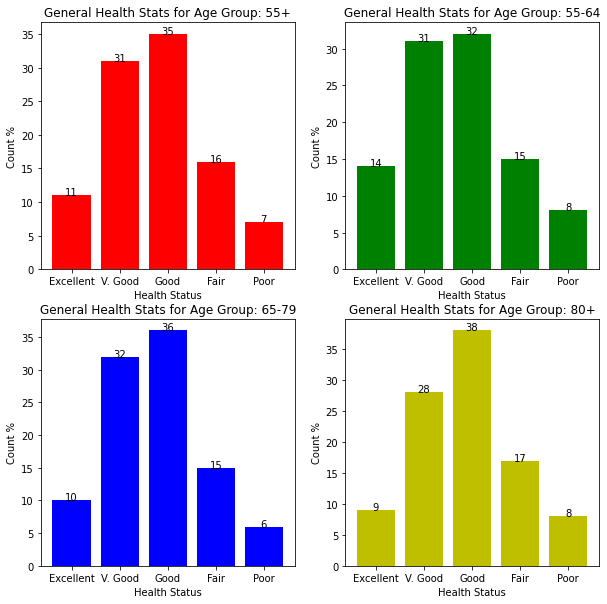

In [229]:
print('*-*-* % of adults reporting fair or poor health - age adjusted *-*-*\n')

age_grps = ['55+', '55-64', '65-79', '80+'] # define labels for title

# group to filter the values based on indicators
gr1 = ['55-64', '65-79', '80+'] # 55+ group
gr2 = ['55-64'] # 55-64 group
gr3 = ['65-79'] # 65-79 group
gr4 = ['80+'] # 80+ group

values_to_filter = [gr1, gr2, gr3, gr4]


# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(10, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_age_grp = df_IN_Health[df_IN_Health['age_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_age_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_age_grp['genhlth'].value_counts()/len(df_IN_age_grp)*100))
    genhlth_key = {1.0 :'Excellent', 2.0:'V. Good', 3.0:'Good', 4.0:'Fair', 5.0:'Poor', 7.0:'Notsure', 9.0:'Refused'}
#     print(df_IN_age_grp['genhlth'].value_counts())
    
    try:
        genhlth_dict.pop(7.0)
        genhlth_dict.pop(9.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    # rename the keys to actual label (1->excellent)
    new_dict = {}
    for ix in genhlth_dict:
        new_dict[genhlth_key[ix]] = genhlth_dict[ix]
#     print('\nUpdated dict-:', new_dict)

    new_dict = OrderedDict([('Excellent', new_dict['Excellent']), ('V. Good', new_dict['V. Good']), ('Good', new_dict['Good']), ('Fair', new_dict['Fair']), ('Poor', new_dict['Poor'])])

    names = list(new_dict.keys())
    values = list(new_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.bar(names, values, color=colors[i])

    # add count label and title
    for ix in range(len(names)):    
        v = int(values[ix])
        ax.text(ix, v, str(v), ha='center', fontsize=10)
        title = 'General Health Stats for Age Group: '+age_grps[i]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('Health Status')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

### 1.1.2 Poor or fair health: Race adjusted

*-*-* % of adults reporting fair or poor health - race adjusted *-*-*



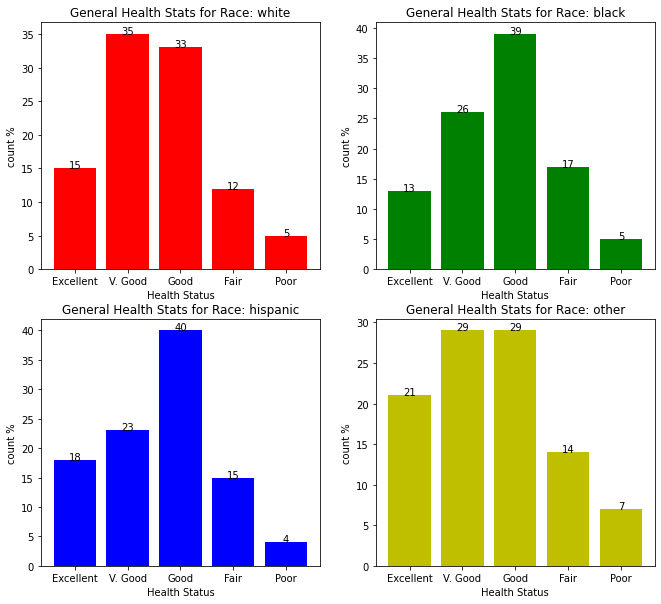

In [230]:
print('*-*-* % of adults reporting fair or poor health - race adjusted *-*-*\n')

# group to filter the values based on indicators
gr1 = ['white'] 
gr2 = ['black'] 
gr3 = ['hispanic'] 
gr4 = ['other']

values_to_filter = [gr1, gr2, gr3, gr4]


# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(11, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_race_grp = df_IN_Health[df_IN_Health['race_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_race_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_race_grp['genhlth'].value_counts()/len(df_IN_race_grp)*100))
    genhlth_key = {1.0 :'Excellent', 2.0:'V. Good', 3.0:'Good', 4.0:'Fair', 5.0:'Poor', 7.0:'Notsure', 9.0:'Refused'}
#     print(df_IN_race_grp['genhlth'].value_counts())

    try:
        genhlth_dict.pop(7.0)
        genhlth_dict.pop(9.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    # rename the keys to actual label (1->excellent)
    new_dict = {}
    for ix in genhlth_dict:
        new_dict[genhlth_key[ix]] = genhlth_dict[ix]
#     print('\nUpdated dict:', new_dict)

    new_dict = OrderedDict([('Excellent', new_dict['Excellent']), ('V. Good', new_dict['V. Good']), ('Good', new_dict['Good']), ('Fair', new_dict['Fair']), ('Poor', new_dict['Poor'])])

    names = list(new_dict.keys())
    values = list(new_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.bar(names, values, color=colors[i])

    # add count label and title
    for ix in range(len(names)):    
        v = int(values[ix])
        ax.text(ix, v, str(v), ha='center', fontsize=10)
    title = 'General Health Stats for Race: '+grp[0]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('Health Status')
    ax.set_ylabel('count %')

# Show the plots
plt.show()

### 1.2 Poor physical health days

*-*-* Average number of physically unhealthy days reported in past 30 days *-*-*



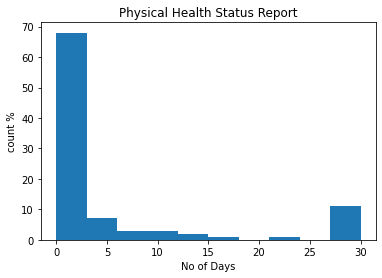

In [273]:
print('*-*-* Average number of physically unhealthy days reported in past 30 days *-*-*\n')

# physhlth - Poor physical health days

df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(round((df_IN_Health_30['physhlth'].value_counts()/len(df_IN_Health_30))*100))
# sns.countplot(data=df_IN_Health_30, x="physhlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''

try:
    genhlth_dict[0] = genhlth_dict.pop(88) # change value 88 to 0 days
    genhlth_dict.pop(77.0) # remove not answered values (77 label)
    genhlth_dict.pop(99.0) # remove not answered values (9 label)
except KeyError: # key is not present in the dictionary
    pass

names = list(genhlth_dict.keys())
values = list(genhlth_dict.values())

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bars with different colors
# ax.bar(names, values)
ax.hist(names, weights=values)

# Set the labels and title
ax.set_xlabel('No of Days')
ax.set_ylabel('count %')
ax.set_title('Physical Health Status Report')

# Show the plot
plt.show()

### 1.2.1 Poor physical health days: Age adjusted.

*-*-* Average number of physically unhealthy days reported in past 30 days - Age adjusted *-*-*



C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2439403334.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_age_grp = df_IN_Health_30[df_IN_Health['age_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2439403334.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_age_grp = df_IN_Health_30[df_IN_Health['age_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2439403334.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_age_grp = df_IN_Health_30[df_IN_Health['age_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2439403334.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_age_grp = df_IN_Health_30[df_IN_Health['age_grp'].isin(grp)]


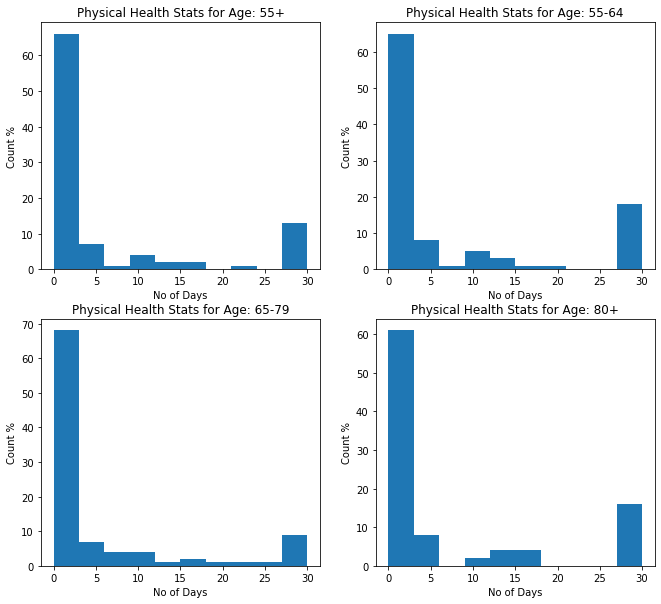

In [232]:
print('*-*-* Average number of physically unhealthy days reported in past 30 days - Age adjusted *-*-*\n')

# filter the past 30 days data based on the date
df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

# sns.countplot(data=df_IN_Health_30, x="physhlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''

age_grps = ['55+', '55-64', '65-79', '80+'] # define labels for title

# group to filter the values based on indicators
gr1 = ['55-64', '65-79', '80+'] # 55+ group
gr2 = ['55-64'] # 55-64 group
gr3 = ['65-79'] # 65-79 group
gr4 = ['80+'] # 80+ group

values_to_filter = [gr1, gr2, gr3, gr4]

# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(11, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_age_grp = df_IN_Health_30[df_IN_Health['age_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_age_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round((df_IN_age_grp['physhlth'].value_counts()/len(df_IN_age_grp))*100))
#     print(df_IN_age_grp['physhlth'].value_counts())    
    
    try:
        genhlth_dict[0] = genhlth_dict.pop(88) # change value 88 to 0 days
        genhlth_dict.pop(77.0) # remove not answered values (77 label)
        genhlth_dict.pop(99.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    names = list(genhlth_dict.keys())
    values = list(genhlth_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.hist(names, weights=values)
    
#     plt.bar(names, values, color=colors[i])
#     # add count label and title
#     for ix in range(len(names)):    
#         v = int(values[ix])
#         ax.text(ix, v, str(v), ha='center', fontsize=10)
    
    
    title = 'Physical Health Stats for Age: '+age_grps[i]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('No of Days')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

### 1.2.2 Poor physical health days: Race adjusted.

*-*-* Average number of physically unhealthy days reported in past 30 days - Race adjusted *-*-*



C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2015189564.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_race_grp = df_IN_Health_30[df_IN_Health['race_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2015189564.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_race_grp = df_IN_Health_30[df_IN_Health['race_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2015189564.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_race_grp = df_IN_Health_30[df_IN_Health['race_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2015189564.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_race_grp = df_IN_Health_30[df_IN_Health['race_grp'].isin(grp)]


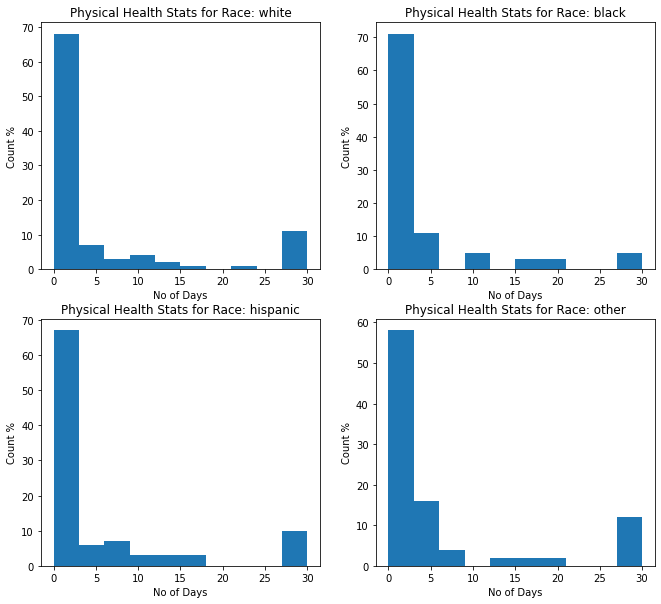

In [275]:
print('*-*-* Average number of physically unhealthy days reported in past 30 days - Race adjusted *-*-*\n')

# filter the past 30 days data based on the date
df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

# sns.countplot(data=df_IN_Health_30, x="physhlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''

# group to filter the values based on indicators
gr1 = ['white'] 
gr2 = ['black'] 
gr3 = ['hispanic'] 
gr4 = ['other']

values_to_filter = [gr1, gr2, gr3, gr4]

# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(11, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_race_grp = df_IN_Health_30[df_IN_Health['race_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_age_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_race_grp['physhlth'].value_counts()/len(df_IN_race_grp)*100))     

    try:
        genhlth_dict[0] = genhlth_dict.pop(88) # change value 88 to 0 days
        genhlth_dict.pop(77.0) # remove not answered values (77 label)
        genhlth_dict.pop(99.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    names = list(genhlth_dict.keys())
    values = list(genhlth_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.hist(names, weights=values)
    
#     plt.bar(names, values, color=colors[i])
#     # add count label and title
#     for ix in range(len(names)):    
#         v = int(values[ix])
#         ax.text(ix, v, str(v), ha='center', fontsize=10)
    
    
    title = 'Physical Health Stats for Race: '+grp[0]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('No of Days')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

### 1.3. Poor mental health days: Average number of mentally unhealthy days reported in past 30 days

*-*-* Average number of mentally unhealthy days reported in past 30 days *-*-*



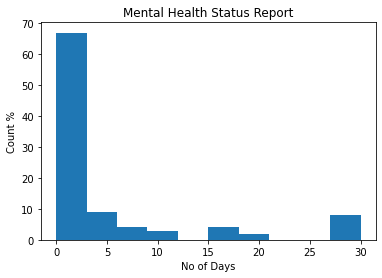

In [277]:
print('*-*-* Average number of mentally unhealthy days reported in past 30 days *-*-*\n')

# menthlth - Poor mental health days

df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

genhlth_dict = dict(round(df_IN_Health_30['menthlth'].value_counts()/len(df_IN_Health_30)*100))     

try:
    genhlth_dict[0] = genhlth_dict.pop(88) # change value 88 to 0 days
    genhlth_dict.pop(77.0) # remove not answered values (77 label)
    genhlth_dict.pop(99.0) # remove not answered values (9 label)
except KeyError: # key is not present in the dictionary
    pass

# sns.countplot(data=df_IN_Health_30, x="menthlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''

names = list(genhlth_dict.keys())
values = list(genhlth_dict.values())

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the pie chart
# ax.bar(names, values)
ax.hist(names, weights=values)

# # Set the title
# ax.set_title('')
# Set the labels and title
ax.set_xlabel('No of Days')
ax.set_ylabel('Count %')
ax.set_title('Mental Health Status Report')

# Show the plot
plt.show()

### 1.3.1 Poor mental health days: Average number of mentally unhealthy days reported in past 30 days (age-adjusted).

*-*-* Average number of mentally unhealthy days reported in past 30 days - Age adjusted *-*-*



C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\1281020575.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_age_grp = df_IN_Health_30[df_IN_Health['age_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\1281020575.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_age_grp = df_IN_Health_30[df_IN_Health['age_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\1281020575.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_age_grp = df_IN_Health_30[df_IN_Health['age_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\1281020575.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_age_grp = df_IN_Health_30[df_IN_Health['age_grp'].isin(grp)]


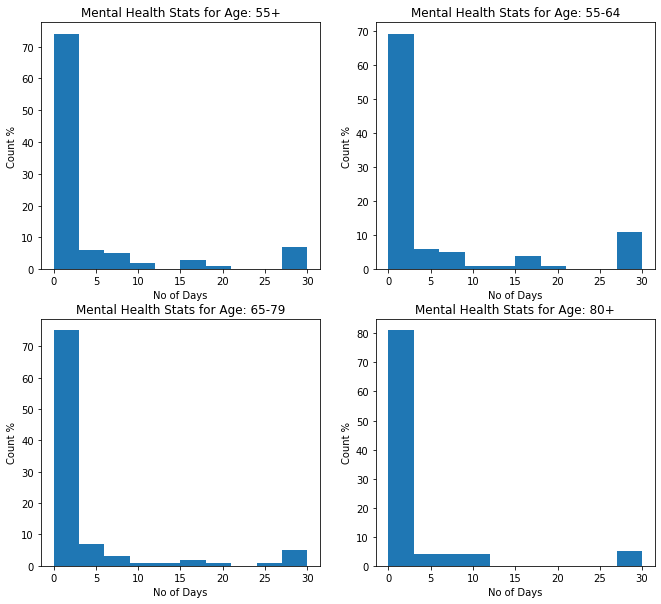

In [279]:
print('*-*-* Average number of mentally unhealthy days reported in past 30 days - Age adjusted *-*-*\n')

# filter the past 30 days data based on the date
df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

# sns.countplot(data=df_IN_Health_30, x="menthlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''

age_grps = ['55+', '55-64', '65-79', '80+'] # define labels for title

# group to filter the values based on indicators
gr1 = ['55-64', '65-79', '80+'] # 55+ group
gr2 = ['55-64'] # 55-64 group
gr3 = ['65-79'] # 65-79 group
gr4 = ['80+'] # 80+ group

values_to_filter = [gr1, gr2, gr3, gr4]

# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(11, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_age_grp = df_IN_Health_30[df_IN_Health['age_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_age_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_age_grp['menthlth'].value_counts()/len(df_IN_age_grp)*100))     
#     print(df_IN_age_grp['menthlth'].value_counts())    
    
    try:
        genhlth_dict[0] = genhlth_dict.pop(88) # change value 88 to 0 days
        genhlth_dict.pop(77.0) # remove not answered values (77 label)
        genhlth_dict.pop(99.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    names = list(genhlth_dict.keys())
    values = list(genhlth_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.hist(names, weights=values)
    
#     plt.bar(names, values, color=colors[i])
#     # add count label and title
#     for ix in range(len(names)):    
#         v = int(values[ix])
#         ax.text(ix, v, str(v), ha='center', fontsize=10)
    
    
    title = 'Mental Health Stats for Age: '+age_grps[i]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('No of Days')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

### 1.3.2 Poor mental health days: Average number of mentally unhealthy days reported in past 30 days (race-adjusted).

*-*-* Average number of mentally unhealthy days reported in past 30 days - Race adjusted *-*-*



C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2127781979.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_race_grp = df_IN_Health_30[df_IN_Health['race_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2127781979.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_race_grp = df_IN_Health_30[df_IN_Health['race_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2127781979.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_race_grp = df_IN_Health_30[df_IN_Health['race_grp'].isin(grp)]
C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2127781979.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_race_grp = df_IN_Health_30[df_IN_Health['race_grp'].isin(grp)]


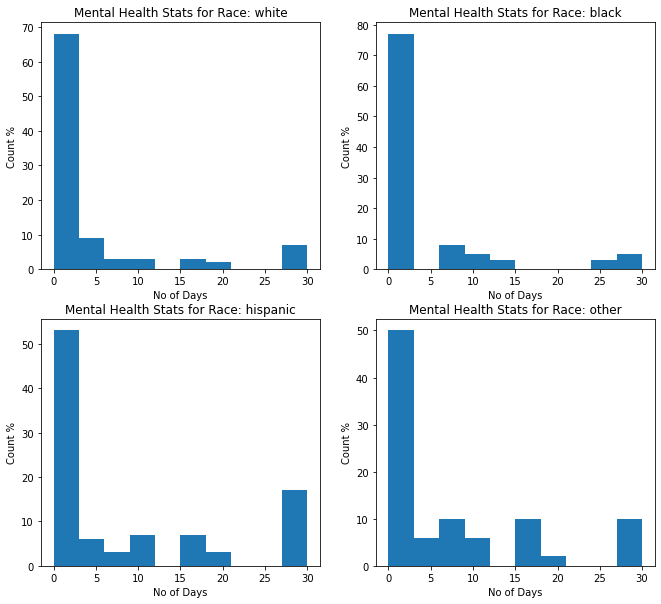

In [282]:
print('*-*-* Average number of mentally unhealthy days reported in past 30 days - Race adjusted *-*-*\n')

# filter the past 30 days data based on the date
df_IN_Health_30 = df_IN_Health[(df_IN_Health['iyear']==2021) & (df_IN_Health['imonth']==12)]

# sns.countplot(data=df_IN_Health_30, x="physhlth")
'''
1-30: No of days
88:   None
77:   Not sure
99:   Refused
'''

# group to filter the values based on indicators
gr1 = ['white'] 
gr2 = ['black'] 
gr3 = ['hispanic'] 
gr4 = ['other']

values_to_filter = [gr1, gr2, gr3, gr4]

# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(11, 10)) # set the size of the plots (width, ht)

for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_race_grp = df_IN_Health_30[df_IN_Health['race_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_age_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_race_grp['menthlth'].value_counts()/len(df_IN_race_grp)*100))     
#     print(df_IN_race_grp['menthlth'].value_counts())    
    
    try:
        genhlth_dict[0] = genhlth_dict.pop(88) # change value 88 to 0 days
        genhlth_dict.pop(77.0) # remove not answered values (77 label)
        genhlth_dict.pop(99.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass

    names = list(genhlth_dict.keys())
    values = list(genhlth_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.hist(names, weights=values)
    
#     plt.bar(names, values, color=colors[i])
#     # add count label and title
#     for ix in range(len(names)):    
#         v = int(values[ix])
#         ax.text(ix, v, str(v), ha='center', fontsize=10)
    
    
    title = 'Mental Health Stats for Race: '+grp[0]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('No of Days')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

## 2. Tobacco USe

### 2.1. Adult Smoking: Percentage of adults who are current smokers.

*-*-* % of adults who are current smokers *-*-*



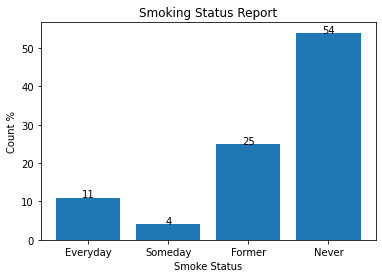

In [284]:
print('*-*-* % of adults who are current smokers *-*-*\n')
    
# calculate the % values for that gr
genhlth_dict = dict(round(df_IN_Health['x.smoker3'].value_counts()/len(df_IN_Health)*100))
genhlth_key = {1 :'Everyday', 2:'Someday', 3:'Former', 4:'Never', 9:'Refused'}

try:
    genhlth_dict.pop(9.0) # remove not answered values (9 label)
except KeyError: # key is not present in the dictionary
    pass

# rename the keys to actual label (1->excellent)
new_dict = {}
for ix in genhlth_dict:
    new_dict[genhlth_key[ix]] = genhlth_dict[ix]
# print('\nUpdated dict:', new_dict)

# keep order of graph fixed
new_dict = OrderedDict([('Everyday', new_dict['Everyday']), ('Someday', new_dict['Someday']), ('Former', new_dict['Former']), ('Never', new_dict['Never'])])

names = list(new_dict.keys())
values = list(new_dict.values())

plt.bar(names, values)

# add count label and title
for ix in range(len(names)):    
    v = int(values[ix])
    plt.text(ix, v, str(v), ha='center', fontsize=10)

# Set the labels and title
plt.xlabel('Smoke Status')
plt.ylabel('Count %')
plt.title('Smoking Status Report')

# Show the plots
plt.show()

### 2.1.1 Adult Smoking: Percentage of adults who are current smokers (age-adjusted).

*-*-* % of adults who are current smokers - age adjusted *-*-*



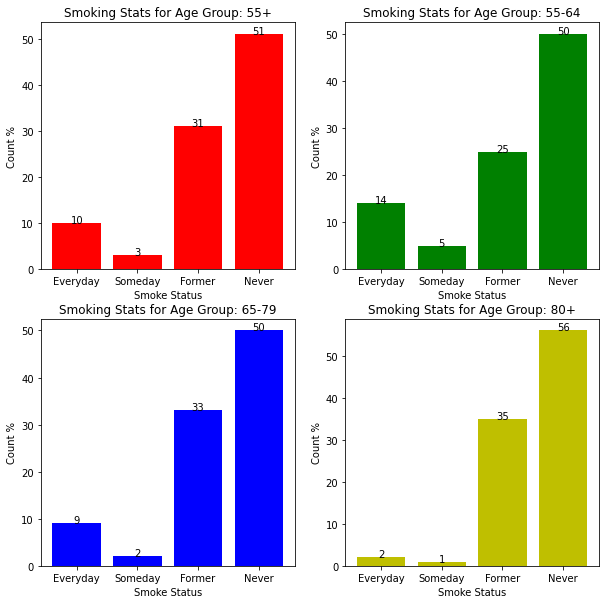

In [288]:
print('*-*-* % of adults who are current smokers - age adjusted *-*-*\n')

age_grps = ['55+', '55-64', '65-79', '80+'] # define labels for title

# group to filter the values based on indicators
gr1 = ['55-64', '65-79', '80+'] # 55+ group
gr2 = ['55-64'] # 55-64 group
gr3 = ['65-79'] # 65-79 group
gr4 = ['80+'] # 80+ group

values_to_filter = [gr1, gr2, gr3, gr4]

# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(10, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_age_grp = df_IN_Health[df_IN_Health['age_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_age_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_age_grp['x.smoker3'].value_counts()/len(df_IN_age_grp)*100))
    genhlth_key = {1 :'Everyday', 2:'Someday', 3:'Former', 4:'Never', 9:'Refused'}
#     print(df_IN_age_grp['x.smoker3'].value_counts())
    
    try:
        genhlth_dict.pop(9) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    # rename the keys to actual label (1->excellent)
    new_dict = {}
    for ix in genhlth_dict:
        new_dict[genhlth_key[ix]] = genhlth_dict[ix]
#     print('\nUpdated dict-:', new_dict)

    new_dict = OrderedDict([('Everyday', new_dict['Everyday']), ('Someday', new_dict['Someday']), ('Former', new_dict['Former']), ('Never', new_dict['Never'])])

    names = list(new_dict.keys())
    values = list(new_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.bar(names, values, color=colors[i])

    # add count label and title
    for ix in range(len(names)):    
        v = int(values[ix])
        ax.text(ix, v, str(v), ha='center', fontsize=10)
        title = 'Smoking Stats for Age Group: '+age_grps[i]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('Smoke Status')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

### 2.1.2 Adult Smoking: Percentage of adults who are current smokers (race-adjusted).

*-*-* % of adults who are current smokers - race adjusted *-*-*



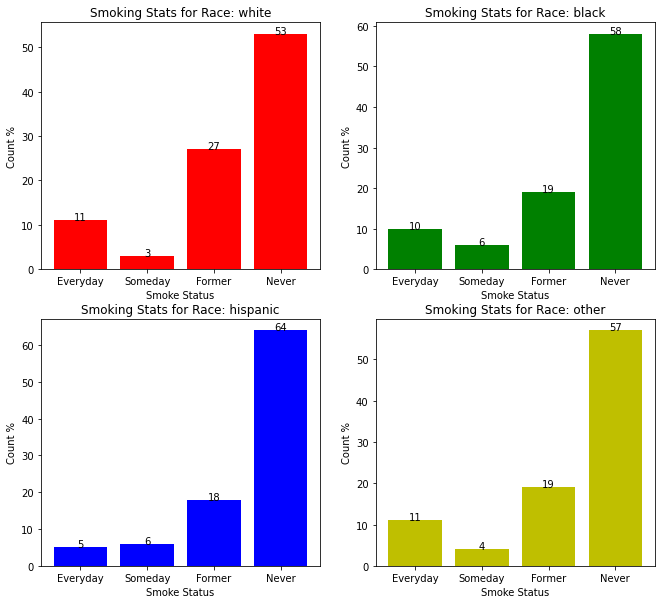

In [290]:
print('*-*-* % of adults who are current smokers - race adjusted *-*-*\n')

# group to filter the values based on indicators
gr1 = ['white'] 
gr2 = ['black'] 
gr3 = ['hispanic'] 
gr4 = ['other']

values_to_filter = [gr1, gr2, gr3, gr4]


# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(11, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_race_grp = df_IN_Health[df_IN_Health['race_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_race_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_race_grp['x.smoker3'].value_counts()/len(df_IN_race_grp)*100))
    genhlth_key = {1 :'Everyday', 2:'Someday', 3:'Former', 4:'Never', 9:'Refused'}
#     print(df_IN_race_grp['x.smoker3'].value_counts())

    try:
        genhlth_dict.pop(7.0)
        genhlth_dict.pop(9.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    # rename the keys to actual label (1->excellent)
    new_dict = {}
    for ix in genhlth_dict:
        new_dict[genhlth_key[ix]] = genhlth_dict[ix]
#     print('\nUpdated dict:', new_dict)

    new_dict = OrderedDict([('Everyday', new_dict['Everyday']), ('Someday', new_dict['Someday']), ('Former', new_dict['Former']), ('Never', new_dict['Never'])])

    names = list(new_dict.keys())
    values = list(new_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.bar(names, values, color=colors[i])

    # add count label and title
    for ix in range(len(names)):    
        v = int(values[ix])
        ax.text(ix, v, str(v), ha='center', fontsize=10)
    title = 'Smoking Stats for Race: '+grp[0]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('Smoke Status')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

## 3. Diet & Exercise

In [246]:
# calculate BMI using wt and ht
df_IN_Health['bmi'] = round(df_IN_Health['wtkg3'] / (df_IN_Health['htm4']))

C:\Users\asawa\AppData\Local\Temp\ipykernel_33884\2868087141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN_Health['bmi'] = round(df_IN_Health['wtkg3'] / (df_IN_Health['htm4']))


### 3.1 Adult Obesity - BMI > 30: Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).

In [293]:
print('*-*-* % of adult population that reports BMI>=30 *-*-*\n')

df_IN_bmi = df_IN_Health[df_IN_Health['bmi']>=30.0]
bmi_report = round((df_IN_bmi.shape[0])/(df_IN_Health.shape[0])*100)
print('BMI:', bmi_report, '%')

*-*-* % of adult population that reports BMI>=30 *-*-*

BMI: 87 %


### 3.1.1 Adult Obesity - BMI > 30: Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).

In [250]:
age_grps = ['55+', '55-64', '65-79', '80+'] # define labels for title

# group to filter the values based on indicators
gr1 = ['55-64', '65-79', '80+'] # 55+ group
gr2 = ['55-64'] # 55-64 group
gr3 = ['65-79'] # 65-79 group
gr4 = ['80+'] # 80+ group

values_to_filter = [gr1, gr2, gr3, gr4]

for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_age_grp = df_IN_Health[df_IN_Health['age_grp'].isin(grp)]
    print(df_IN_age_grp.shape[0], df_IN_age_grp[df_IN_age_grp['bmi']>=30.0].shape[0])
    bmi_report = round((df_IN_age_grp[df_IN_age_grp['bmi']>=30.0].shape[0])/(df_IN_age_grp.shape[0])*100)
    print('Age grp', age_grps[i], '-->', bmi_report, '%')

5297 4653
Age grp 55+ --> 88 %
1933 1699
Age grp 55-64 --> 88 %
2558 2240
Age grp 65-79 --> 88 %
806 714
Age grp 80+ --> 89 %


### 3.1.2 Adult Obesity - BMI > 30: Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (race-adjusted).

In [252]:
# group to filter the values based on indicators
gr1 = ['white'] 
gr2 = ['black'] 
gr3 = ['hispanic'] 
gr4 = ['other']

values_to_filter = [gr1, gr2, gr3, gr4]

for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_race_grp = df_IN_Health[df_IN_Health['race_grp'].isin(grp)]
    print(df_IN_race_grp.shape[0], df_IN_race_grp[df_IN_race_grp['bmi']>=30.0].shape[0])
    bmi_report = round((df_IN_race_grp[df_IN_race_grp['bmi']>=30.0].shape[0])/(df_IN_race_grp.shape[0])*100)
    print('Race grp', grp[0], '-->', bmi_report, '%')

7847 6907
Race grp white --> 88 %
781 682
Race grp black --> 87 %
500 409
Race grp hispanic --> 82 %
550 469
Race grp other --> 85 %


### 3.2 Physical inactivity: Percentage of adults age 18 and over reporting no leisure-time physical activity.

*-*-* % of adults who are physically inactive *-*-*



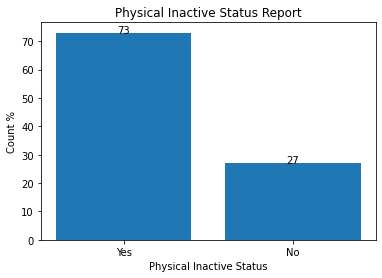

In [295]:
# exerany2
# sns.countplot(data=df_IN_Health, x="exerany2")

'''
1: Yes
2: No
7: Not sure
9: Refused
'''

print('*-*-* % of adults who are physically inactive *-*-*\n')

# calculate the % values for that gr
genhlth_dict = dict(round(df_IN_Health['exerany2'].value_counts()/len(df_IN_Health)*100))
genhlth_key = {1.0:'Yes', 2.0:'No', 7.0:'Not sure', 9.0:'Refused'}

try:
    genhlth_dict.pop(7.0)
    genhlth_dict.pop(9.0) # remove not answered values (9 label)
except KeyError: # key is not present in the dictionary
    pass

# rename the keys to actual label (1->excellent)
new_dict = {}
for ix in genhlth_dict:
    new_dict[genhlth_key[ix]] = genhlth_dict[ix]
# print('\nUpdated dict:', new_dict)

# keep order of graph fixed
new_dict = OrderedDict([('Yes', new_dict['Yes']), ('No', new_dict['No'])])

names = list(new_dict.keys())
values = list(new_dict.values())

plt.bar(names, values)

# add count label and title
for ix in range(len(names)):    
    v = int(values[ix])
    plt.text(ix, v, str(v), ha='center', fontsize=10)

# Set the labels and title
plt.xlabel('Physical Inactive Status')
plt.ylabel('Count %')
plt.title('Physical Inactive Status Report')

# Show the plots
plt.show()

### 3.2.1 Physical inactivity: Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).

*-*-* % of adults who are physically inactive - age adjusted *-*-*



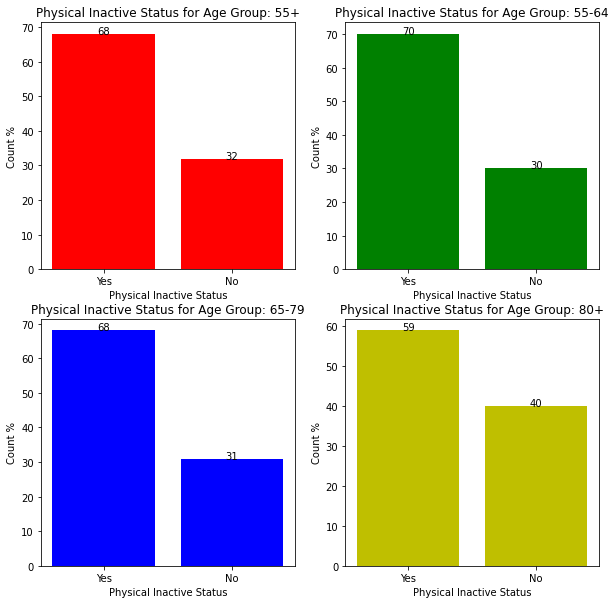

In [298]:
print('*-*-* % of adults who are physically inactive - age adjusted *-*-*\n')

age_grps = ['55+', '55-64', '65-79', '80+'] # define labels for title

# group to filter the values based on indicators
gr1 = ['55-64', '65-79', '80+'] # 55+ group
gr2 = ['55-64'] # 55-64 group
gr3 = ['65-79'] # 65-79 group
gr4 = ['80+'] # 80+ group

values_to_filter = [gr1, gr2, gr3, gr4]

# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(10, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_age_grp = df_IN_Health[df_IN_Health['age_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_age_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_age_grp['exerany2'].value_counts()/len(df_IN_age_grp)*100))
    genhlth_key = {1.0:'Yes', 2.0:'No', 7.0:'Not sure', 9.0:'Refused'}
#     print(df_IN_age_grp['exerany2'].value_counts())
    
    try:
        genhlth_dict.pop(7.0)
        genhlth_dict.pop(9.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    # rename the keys to actual label (1->excellent)
    new_dict = {}
    for ix in genhlth_dict:
        new_dict[genhlth_key[ix]] = genhlth_dict[ix]
#     print('\nUpdated dict-:', new_dict)

    new_dict = OrderedDict([('Yes', new_dict['Yes']), ('No', new_dict['No'])])

    names = list(new_dict.keys())
    values = list(new_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.bar(names, values, color=colors[i])

    # add count label and title
    for ix in range(len(names)):    
        v = int(values[ix])
        ax.text(ix, v, str(v), ha='center', fontsize=10)
        title = 'Physical Inactive Status for Age Group: '+age_grps[i]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('Physical Inactive Status')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

### 3.2.2 Physical inactivity: Percentage of adults age 18 and over reporting no leisure-time physical activity (race-adjusted).

*-*-* % of adults who are physically inactive - race adjusted *-*-*

r ['white'] (7847, 32)
1.0    5799
2.0    2026
7.0      17
9.0       5
Name: exerany2, dtype: int64
g ['black'] (781, 32)
1.0    521
2.0    256
9.0      3
7.0      1
Name: exerany2, dtype: int64
b ['hispanic'] (500, 32)
1.0    346
2.0    152
7.0      1
9.0      1
Name: exerany2, dtype: int64
y ['other'] (550, 32)
1.0    411
2.0    138
7.0      1
Name: exerany2, dtype: int64


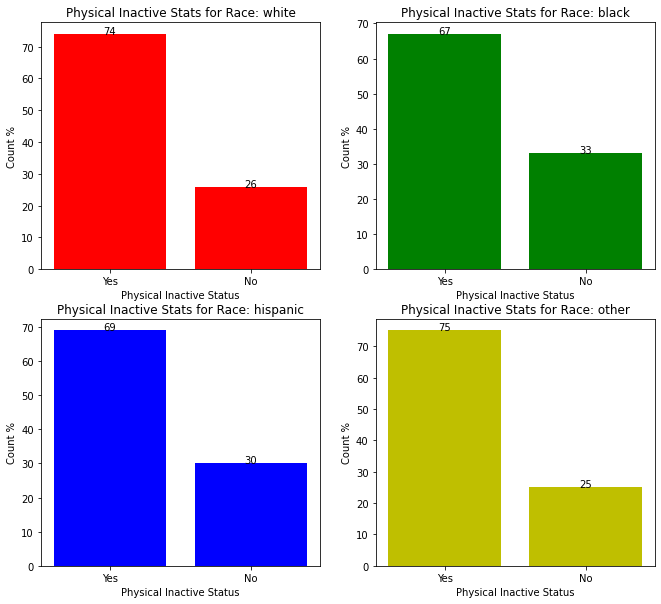

In [299]:
print('*-*-* % of adults who are physically inactive - race adjusted *-*-*\n')

# group to filter the values based on indicators
gr1 = ['white'] 
gr2 = ['black'] 
gr3 = ['hispanic'] 
gr4 = ['other']

values_to_filter = [gr1, gr2, gr3, gr4]


# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(11, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_race_grp = df_IN_Health[df_IN_Health['race_grp'].isin(grp)]
    print(colors[i], grp, df_IN_race_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_race_grp['exerany2'].value_counts()/len(df_IN_race_grp)*100))
    genhlth_key = {1.0:'Yes', 2.0:'No', 7.0:'Not sure', 9.0:'Refused'}
    print(df_IN_race_grp['exerany2'].value_counts())

    try:
        genhlth_dict.pop(7.0)
        genhlth_dict.pop(9.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    # rename the keys to actual label (1->excellent)
    new_dict = {}
    for ix in genhlth_dict:
        new_dict[genhlth_key[ix]] = genhlth_dict[ix]
#     print('\nUpdated dict:', new_dict)

    new_dict = OrderedDict([('Yes', new_dict['Yes']), ('No', new_dict['No'])])

    names = list(new_dict.keys())
    values = list(new_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.bar(names, values, color=colors[i])

    # add count label and title
    for ix in range(len(names)):    
        v = int(values[ix])
        ax.text(ix, v, str(v), ha='center', fontsize=10)
    title = 'Physical Inactive Stats for Race: '+grp[0]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('Physical Inactive Status')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

## 4. Alcohol & Drug Use

### 4.1 Excessive Drinking: Percentage of adults reporting binge or heavy drinking (age-adjusted)

*-*-* % of adults who reported binge/heavy drinking *-*-*



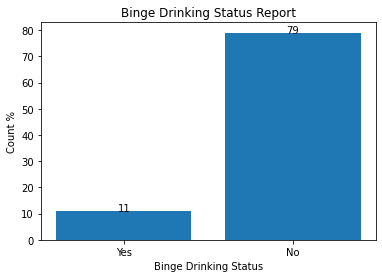

In [301]:
# exerany2
# sns.countplot(data=df_IN_Health, x="exerany2")

'''
1: No
2: Yes
9: Refused
'''

print('*-*-* % of adults who reported binge/heavy drinking *-*-*\n')

# calculate the % values for that gr
genhlth_dict = dict(round(df_IN_Health['x.rfbing5'].value_counts()/len(df_IN_Health)*100))
genhlth_key = {1:'No', 2:'Yes', 9:'Refused'}

try:
    genhlth_dict.pop(9.0) # remove not answered values (9 label)
except KeyError: # key is not present in the dictionary
    pass

# rename the keys to actual label (1->excellent)
new_dict = {}
for ix in genhlth_dict:
    new_dict[genhlth_key[ix]] = genhlth_dict[ix]
# print('\nUpdated dict:', new_dict)

# keep order of graph fixed
new_dict = OrderedDict([('Yes', new_dict['Yes']), ('No', new_dict['No'])])

names = list(new_dict.keys())
values = list(new_dict.values())

plt.bar(names, values)

# add count label and title
for ix in range(len(names)):    
    v = int(values[ix])
    plt.text(ix, v, str(v), ha='center', fontsize=10)

# Set the labels and title
plt.xlabel('Binge Drinking Status')
plt.ylabel('Count %')
plt.title('Binge Drinking Status Report')

# Show the plots
plt.show()

### 4.1.1 Excessive Drinking: Percentage of adults reporting binge or heavy drinking (age-adjusted)

*-*-* % of adults who reported binge drinking - age adjusted *-*-*



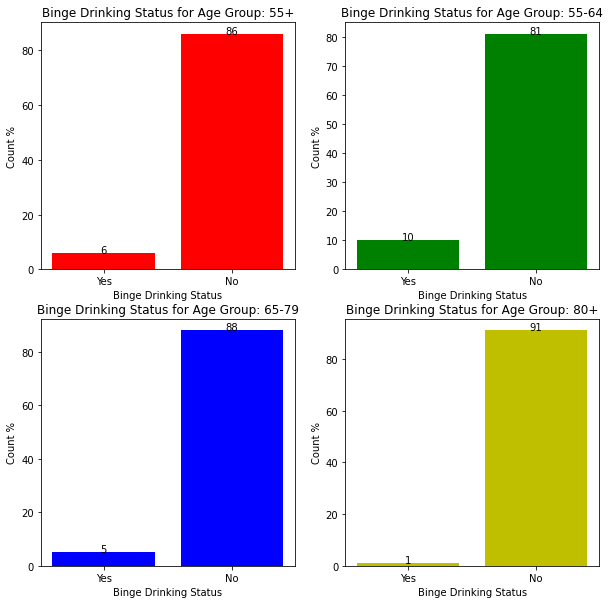

In [303]:
print('*-*-* % of adults who reported binge drinking - age adjusted *-*-*\n')

age_grps = ['55+', '55-64', '65-79', '80+'] # define labels for title

# group to filter the values based on indicators
gr1 = ['55-64', '65-79', '80+'] # 55+ group
gr2 = ['55-64'] # 55-64 group
gr3 = ['65-79'] # 65-79 group
gr4 = ['80+'] # 80+ group

values_to_filter = [gr1, gr2, gr3, gr4]

# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(10, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_age_grp = df_IN_Health[df_IN_Health['age_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_age_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_age_grp['x.rfbing5'].value_counts()/len(df_IN_age_grp)*100))
    genhlth_key = {1:'No', 2:'Yes', 9:'Refused'}
#     print(df_IN_age_grp['x.rfbing5'].value_counts())
    
    try:
        genhlth_dict.pop(9.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    # rename the keys to actual label (1->excellent)
    new_dict = {}
    for ix in genhlth_dict:
        new_dict[genhlth_key[ix]] = genhlth_dict[ix]
#     print('\nUpdated dict-:', new_dict)

    new_dict = OrderedDict([('Yes', new_dict['Yes']), ('No', new_dict['No'])])

    names = list(new_dict.keys())
    values = list(new_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.bar(names, values, color=colors[i])

    # add count label and title
    for ix in range(len(names)):    
        v = int(values[ix])
        ax.text(ix, v, str(v), ha='center', fontsize=10)
        title = 'Binge Drinking Status for Age Group: '+age_grps[i]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('Binge Drinking Status')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

### 4.1.2 Excessive Drinking: Percentage of adults reporting binge or heavy drinking (race-adjusted)

*-*-* % of adults who binge drinking - race adjusted *-*-*



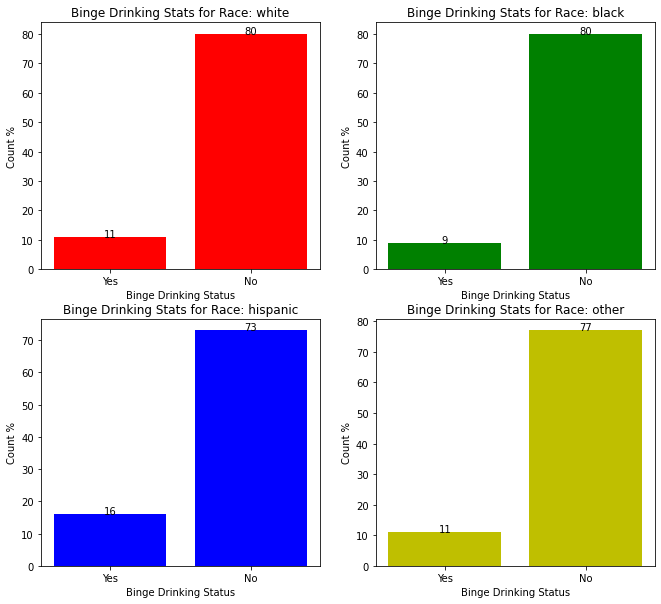

In [305]:
print('*-*-* % of adults who binge drinking - race adjusted *-*-*\n')

# group to filter the values based on indicators
gr1 = ['white'] 
gr2 = ['black'] 
gr3 = ['hispanic'] 
gr4 = ['other']

values_to_filter = [gr1, gr2, gr3, gr4]


# Position of each subplot where 221 means 2 row, 2 columns, 1st index
positions = [221, 222, 223, 224]
  
# Colors to distinguish the plot
colors = ['r', 'g', 'b', 'y']
  
# Plot the subgraphs
fig = plt.figure(figsize=(11, 10)) # set the size of the plots (width, ht)


for i, grp in enumerate(values_to_filter): # loop to plot 4 graphs
    # select the age grp to plot graph based on above defined gr
    df_IN_race_grp = df_IN_Health[df_IN_Health['race_grp'].isin(grp)]
#     print(colors[i], grp, df_IN_race_grp.shape)
    
    # calculate the % values for that gr
    genhlth_dict = dict(round(df_IN_race_grp['x.rfbing5'].value_counts()/len(df_IN_race_grp)*100))
    genhlth_key = {1:'No', 2:'Yes', 9:'Refused'}
#     print(df_IN_race_grp['x.rfbing5'].value_counts())

    try:
        genhlth_dict.pop(9.0) # remove not answered values (9 label)
    except KeyError: # key is not present in the dictionary
        pass
    
    # rename the keys to actual label (1->excellent)
    new_dict = {}
    for ix in genhlth_dict:
        new_dict[genhlth_key[ix]] = genhlth_dict[ix]
#     print('\nUpdated dict:', new_dict)

    new_dict = OrderedDict([('Yes', new_dict['Yes']), ('No', new_dict['No'])])

    names = list(new_dict.keys())
    values = list(new_dict.values())

    ax = fig.add_subplot(positions[i]) # arrange the position of graph
    plt.bar(names, values, color=colors[i])

    # add count label and title
    for ix in range(len(names)):    
        v = int(values[ix])
        ax.text(ix, v, str(v), ha='center', fontsize=10)
    title = 'Binge Drinking Stats for Race: '+grp[0]
    ax.set_title(str(title))
    # Set the labels and title
    ax.set_xlabel('Binge Drinking Status')
    ax.set_ylabel('Count %')

# Show the plots
plt.show()

## - Weight Factor ~ 6.8 M

In [ ]:
# weight features

print(df_Indiana[['x.llcpwt2']].sum())
print(df_Indiana[['x.llcpwt']].sum())
print(df_Indiana[['x.cllcpwt']].sum())

total=(1565837+5262173)
print('\nLLCPWT ~6.8 M:', total)

## - Reference Var

### Age Var | Filter: 55+, 55-64, 65-84, 85+
AGEG5YR (5 yer group)
CADULT1 (1: yes 18>, Blank: not asked/missing) landline
LADULT1 (1: yes, 2: Terminate phone cal, Blank: missing) cellphone

### Race Var | Filter: white, black, hispanic, other
IMPRACE (imputed if not answered), RACE, RACEGR3
white, black, asian, american, hispanic, other


In [ ]:
# Binge drinkers (males having five or more drinks on one occasion, females having four or more drinks on one occasion)
binge_dict = dict(round(df_IN_Health['x.rfbing5'].value_counts()/len(df_IN_Health)*100))
print(binge_dict)

plt.pie(binge_dict.values(), labels=binge_dict.keys(), autopct='%1.1f%%')

# set the x and y axis labels
plt.legend()

# set the plot title
plt.title('Binge Drinker Counts')

# display the plot
plt.show()

'''
1: No
2: Yes
9: Refused
'''

print('***There are only 11.1% who reported binge drinking')

In [ ]:
# Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion?

# sns.countplot(data=df_IN_Health, x="drnk3ge5")
'''
1-76: No of days
88:   None
77:   Not sure
99:   Refused
'''